# Chapter 5: Files

In this chapter, we will learn how to work with files on disk, and introduce some important concepts along the way: the use of external libraries, character encodings and file paths.

---

## Importing external modules

Most of the functionality we have used so far, is simply built into the Python language itself. Often, however, you need to use external modules in your code, to have access to more specific functionality that you do not want to code yourself. A lot of external modules are already available in the Python Standard Library, for a wide variety of tasks. There are also countless third-party providers of Python modules. 

To use an external module in your code, you need to explicitly 'import' it. Consider for example the module `random` from the standard library, which contains functions for generating random numbers:

In [ ]:
import random
print(random.randint(0, 10)) # randint takes two arguments: the lower and upper bound between which to choose an int

Note the syntax used: using the dot, we indicate that our machine should look for the `randint()` function inside the `random` module we just imported. You can import an entire module or import only a specific function in the module. We could also have imported the (single) function we needed as follows:

In [ ]:
from random import randint
print(randint(0, 100))

In this case we wouldn't have to specify where our machine should find the `randint()` function. This can save on some typing if you have to use the function often in your code. You can also (temporarily) change the names of the functions you import, using the `as` syntax:

In [ ]:
from random import randint as random_integer
print(random_integer(0, 100))

Imported libraries stay available throughout a session, so you only need to import them once in a notebook (although it does not hurt to import the same library more than once).

---

## A word on encodings

Text files are written to disk using 0s and 1s. As a result, computers need a way of converting between letters and bits. This is done using a *character set* or *encoding*: a mapping table that maps a set of characters to a binary representation. Most character sets use 8 bits (1 byte) for encoding a character. 8 bits provide 2 to the power of 8 possible combinations (256), so a typical character set can only represent 256 different characters.

In the heyday of computers, English was the language of choice. The typical English characters were encoded using the first 128 bit combinations (a to z, A to Z, 0 to 9, punctuation marks etc). This became a standard, known as the ASCII character set. Later, computer manufacturers started filling up the remaining 128 combinations to allow for characters with accents, Greek and Cyrillic characters, ...

There were two problems, however. First, there is no easy way of telling which character set a plain text file is encoded in. If someone on a Greek computer sent a text file to someone in France, any character not in the ASCII set would look wrong on the French end. You can still see this sometimes when you use special characters in web forms that do not take into account encodings.

Another problem is that there were no standards for encoding non-ASCII characters: every manufacturer just made up encodings as needed. This changed with the Unicode standardization effort. It describes every possible character in any script, and allows encodings to be mapped to it. Using Unicode as an interlingua, we can now translate between encodings, as long as the characters to be translated exist in both sets.

Python uses Unicode internally. Any text it receives is translated (*decoded*) into Unicode (e.g. using the computer's default encoding). When it writes out to a file (or to your screen), it again *encodes* the Unicode characters using a specified (or the system's default) encoding.

Finally, UTF-8 should be your character encoding of choice. It allows to encode any Unicode character, and uses as few bytes as possible to do that. Always using UTF-8 has the advantage that you never have to guess which character encoding you used, and that no matter which characters appear in your text, UTF-8 will be able to represent them.

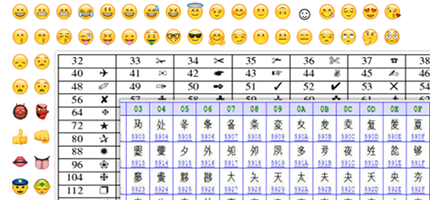

-----

## Reading in files

Input for your programs often comes from files on your disk, such as 'corpora' (a 'corpus' is what we call a large collection of digital text in linguistics). Likewise, you often want output to be written back to files on your disk as well. Thus, reading and writing files is often an essential part of programming and, lucky, for us, this is really simple in Python. The following example reads a file from disk, the default way:

In [ ]:
f = open('data/austen-emma-excerpt.txt', 'r')
text = f.read()
f.close()
print(text)

Since we will be working with text files a lot, we need to be able to read in different kinds of encodings. We use the `codecs` library for that. Because it is good practice and keeps things simpler, we will henceforth always use this library for working with files. It is almost exactly the same as before, we just need to add the `import` statement, and specify the input file encoding:

In [ ]:
import codecs
f = codecs.open('data/austen-emma-excerpt.txt', 'r', 'utf-8')
text = f.read()
f.close()
print(text)

So what exactly happens here? The `open()` function does not return the actual text that is saved in the text file. It only returns a so-called 'file object' from which we can read the content using the `.read()` function. We passed three arguments to the `open()` function:

 * the path to the file that you wish to open. A path specifies a location on disk, using folder and file names combined with forward slashes (backward slashes on Windows, for some reason). There are two kinds of paths (more on this below, when we discuss directories):
   * *relative paths* start from the location where the code is run from (in the case of a notebook: the location where the notebook is saved). They are shorter and more robust when the code is moved together with the data (so they do not change relative to each other). However, they are sensitive to where the code is run from.
   * *absolute paths* start from the root of the system. They work no matter where the code is run from, but break when you move the data or run it on a different computer.
 * the mode: 'r' represents read mode, so that the file will be opened for reading (and e.g. not for writing).
 * the last argument specifies the encoding of the text file.

After having read the contents from the file, we can `close()` it. If you omit this, Python will close the file for you at the end of code execution, but it is good practice to close it explicitly.

In the following command block we will try to open a file with a different encoding than what is expected. Consider the typical error message.

In [ ]:
import codecs
f = codecs.open('data/pflam_001.txt', 'r', 'utf-8')
text = f.read()
f.close()

It is very important to solve the encoding problems, since they may affect dramatically the quality of the output of your project (especially for languages with accented letters or special signs). Two good methods to do this:
•open the file in a text editor such as NotePad++ and check the encoding (function 'Karakterset' in the Dutch version). Convert if necessary.
•use the function ".encoding" to identify the encoding. Once you find the identifier you should look up the correct way of referring to this encoding. In this case, for example, you will find that cp1252 corresponds to 'Latin-1'.

In [ ]:
f = codecs.open('data/pflam_001.txt', 'r')
print(f.encoding)
f.close()

# f = codecs.open('data/pflam_001.txt', 'r', 'latin-1')
# text = f.read()
# print(text)

Reading an entire file in one string is not always desirable, especially not with huge files. The following example reads up until a newline everytime, and returns one line at a time. 


In [ ]:
f = codecs.open('data/austen-emma-excerpt.txt', 'r', encoding='utf-8')
for line in f: # Yes, we can do looping over a file object too!
    print(line)
f.close()

As you can see, we now get double spacing (double newlines). This is because every line in our file ends with a newline character `"\n"`. The `print` function always adds a newline by default, so we print a total of two newline characters per line. As a reminder, this is how you can use newlines yourself:

In [ ]:
s = "This is the first line.\nThis is the second line."
print(s)

There exists a similar character to encode 'tab' characters, namely `\t`. You can use this character to play around with the indentation of your (e.g. hierarchically structured) output:


In [ ]:
s = "First line\n\t* Second line\n\t* Third line\n\t* Fourth line\nFifth line"
print(s)

If you are not happy with the double spacing above and wish to remove all preceding and trailing whitespace in a string (newlines, spaces, but also tabs), you can use the `strip()` function:

In [ ]:
s = "   strip me!    \n"
print(s)
print(s.strip())

Now, try to adapt the code that read in the Austen file and have your code print each line without the preceding and trailing whitespace! Have the annoying "double lines" disappeared in your output? 

In [ ]:
f = codecs.open('data/austen-emma-excerpt.txt','r', 'utf-8')
for line in f:
    print(line)
f.close()

Rather than just printing, we can of course do whatever we want with this file's content. Let's count the number of lines (but note that a line does not necessarily correspond to a sentence).

In [ ]:
count = 0
f = codecs.open('data/austen-emma-excerpt.txt', 'r', 'utf-8')
for line in f:
    count += 1
f.close()
print(count)

#### DIY 1

Read the file `data/austen-emma-excerpt.txt` and compute the average length (in characters) of the lines.

In [ ]:
f = codecs.open('data/austen-emma-excerpt.txt', 'r', 'utf-8')
# insert your code here
# important: remember to properly close your file again!

- - -

## Writing out files

Now that we mastered the art of reading files, let's move on to writing files, which follows a similar logic:

In [ ]:
f = codecs.open('data/testoutput.txt', 'w', 'utf-8')
f.write("Hello world!")
f.close()

In this code block, we have automatically created a new file called `testoutput.txt` in the `data` directory. We then wrote a single line to this file and then we closed it. Note that the `w` is a crucial difference: if you would have used `r` here, Python would have opened the file in 'read-only' mode and you wouldn't have been able to write to it.

If you want your data to be written on multiple lines, you need to take care to explicitly encode the newlines. Instead of:
    

In [ ]:
f = codecs.open('data/testouput.txt','w', 'utf-8')
f.write("Hello world on the first line!")
f.write("Hello world on the second line!")
f.close()

You need to write:

In [ ]:
f = codecs.open('data/testoutput.txt','w', 'utf-8')
f.write("Hello world on the first line!\n")
f.write("Hello world on the second line!")
f.close()

Otherwise your file would have `Hello world on the first line!Hello world on the second line!` in it, i.e. without a newline in between.

Besides 'read-mode' and 'write-mode' when dealing with text files, there is also the 'append-mode' in Python. Watch out: in 'write-mode', you will always *overwrite* the existing content of the file. However, if you've opened a file in 'append-mode', everything you write to the file will be added at the end of the file, without deleting anything of the existing content in the file. In order to enable the append mode, you need to specify `'a'` as your second parameter when you open files.

In [ ]:
# append one more sentence to the file 'testoutput.txt'

#### DIY 2

Read the file `data/austen-emma-excerpt-tokenised.txt`, and write to a file `data/words.txt` all lowercased tokens (= words and punctuation marks) occurring in this text (without duplicates!), alphabetically ordered, one word per line. That way, you are really creating a lexicon or word list of the text. (Tip: you should use `set()` in this exercise!)

In [ ]:
# insert your code here

Check your output by viewing the `words.txt` file in a text editor such as Sublime Text or Notepad++ (Windows users: do not use Notepad!)

---

## Working with directories

It's time to scale up our operations to not just working with one file, but with collections of files! After all, that is one of the reasons why programming is so handy: it makes it easy to do repetitive tasks fast. Here, we will work with an interesting, yet not too large dataset, namely the well-known Arabian nights. *Alf Laylah Wa Laylah, the Stories of One Thousand and One Nights* is a collection of folk tales, collected over many centuries by various authors, translators, and scholars across West, Central and South Asia and North Africa. It forms a huge narrative wheel with an overarching plot, created by the frame story of Shahrazad.

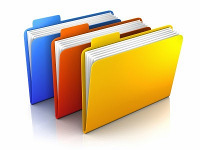

In the notebooks we use, there is a convenient way to quickly inspect the contents of a folder using the `ls` command (note that this is not a Python command, just something for the notebooks). Our Arabian nights are contained under the general `data` folder:

In [ ]:
ls data\arabian_nights

As you can see, this folder holds a number of plain text files, ending in the `.txt` extension. Let us open a random file:

In [ ]:
f = codecs.open('data/arabian_nights/848.txt', 'r', 'utf-8')
text = f.read()
f.close()
print(text[:500])

Make sure that you do not pass the `'w'` parameter ("write") to `open()`, instead of `'r'` ("read"), since this would overwrite and thus erase the existing file.  After assigning the string returned by `f.read()` to the variable `text`, we print the 500 first characters of `text` to get an impression of what it contains, using simple string indexing (`[:500]`).

Don't forget to close the file again after you have opened or strange things could happen to your file! One little trick which is commonly used to avoid having to explicitly open and close your file is a `with` block (mind the indentation):

In [ ]:
with codecs.open('data/arabian_nights/848.txt', 'r', 'utf-8') as f:
    text = f.read()
print(text[:500])

This code block does exactly the same thing as the previous one but saves you some typing. In this chapter we would like to work with all the files in the `arabian_nights` directory. This is where loops come in handy of course, since what we really would like to do, is iterate over the contents of the directory. Accessing these contents in Python is easy, but requires importing some extra functionality. In this case, we need to import the `os` module, which contains all functionality related to the OS, the *operating system* of your machine, such as directory information:  

In [ ]:
import os

Using the dot-syntax (`os.xxx`), we can now access all functions that come with this module, such as `listdir()`, which returns a list of the items which are included under a given directory

In [ ]:
filenames = os.listdir('data/arabian_nights')
print(filenames[:20])

The function `os.listdir()` returns a list of strings, representing the filenames contained under a directory. It has the same functionality as the `ls` command in a notebook.

#### DIY 3

1. Some of the 1001 nights are missing. How many?
2. Can you come up with a clever way to find out which nights are missing? Hint: a while loop over a counter (to 1001) and some string casting might be useful here!

In [ ]:
# your code goes here


With `os.listdir()`, you need to make sure that you pass the correct path to an existing directory:  

In [ ]:
os.listdir('data/belgian_nights')

It might therefore be convenient to check whether a directory actually exists in a given location, using the `os.path` submodule, which defines a range of interesting functions for working with paths:

In [ ]:
print(os.path.isdir('data/arabian_nights'))
print(os.path.isdir('data/belgian_nights'))

The second directory, naturally, does not exist and `isdir()` evaluates to `False` in this case. Creating a new (and thus empty) directory is also easy using `os`:

In [ ]:
os.mkdir('belgian_nights')

We can see that it lives in the present working directory now, by typing `ls` again:

In [ ]:
ls

Or we use Python:

In [ ]:
print(os.path.isdir('belgian_nights'))

Removing directories is also easy, but PLEASE watch out, sometimes it is too easy: if you remove a wrong directory in Python, it will be gone forever... Unlike other applications, Python does not keep a copy of it in your Trash and it does not have a Ctrl-Z button. Please watch out with what you do, since with great power comes great responsiblity! Removing the entire directory which we just created can be done as follows:  

In [ ]:
import shutil
shutil.rmtree('belgian_nights')

And lo behold: the directory has disappeared again:

In [ ]:
print(os.path.isdir('belgian_nights'))

Here, we use the `rmtree()` command to remove the entire directory in a *recursive* way: even if the directory isn't empty and contains files and subfolders, we will remove all of them. The `os` module also comes with a `rmdir()` but this will not allow you to remove a directory which is not empty, as becomes clear in the `OSError` raised below:  

In [ ]:
os.rmdir('data/arabian_nights')

The folder contains things and therefore cannot be removed using this function. There are, of course, also ways to remove individual files or check whether they exist:

In [ ]:
os.mkdir('data/belgian_nights')
f = codecs.open('data/belgian_nights/1001.txt', 'w', 'utf8')
f.write('Content')
f.close()
print(os.path.exists('data/belgian_nights/1001.txt'))
os.remove('data/belgian_nights/1001.txt')
print(os.path.exists('data/belgian_nights/1001.txt'))

Here, we created a directory, wrote a new file to it (`1001.txt`), and removed it again. Using `os.path.exists()` we monitored at which point the file existed. Finally, the `shutil` module also ships with a useful `copyfile()` function which allows you to copy files from one location to another, possibly with another name. To copy night 66 to the present directory, for instance, we could do: 

In [ ]:
shutil.copyfile('data/arabian_nights/66.txt', 'new_66.txt')

Indeed, we have added an exact copy of night 66 to our present working directory:

In [ ]:
ls

We can safely remove it again:

In [ ]:
os.remove('new_66.txt')

### Paths

The paths we have used so far are 'relative' paths, in the sense that they are relative to the place on our machine from which we execute our Python code. Absolute paths can also be retrieved and will differ on each computer, because they typically include user names etc:

In [ ]:
os.path.abspath('data/arabian_nights/848.txt')

While absolute paths are longer to type, they have the advantage that they can be used anywhere on your computer (i.e. irrespective of where you run your code from). Paths can be tricky. Suppose that we would like to open one of our filenames:

In [ ]:
filenames = os.listdir('data/arabian_nights')
random_filename = filenames[9]
with codecs.open(random_filename, 'r', 'utf8') as f:
    text = f.read()
print(text[:500])

Python throws a `FileNotFoundError`, complaining that the file we wish to open does not exist. This situation stems from the fact that `os.listdir()` only returns the base name of a given file, and not an entire (absolute or relative) path to it. To properly access the file, we must therefore not forget to include the rest of the path again: 

In [ ]:
filenames = os.listdir('data/arabian_nights')
random_filename = filenames[9]
with codecs.open('data/arabian_nights/'+ random_filename, 'r', 'utf8') as f:
    text = f.read()
print(text[:500])

Instead of doing string concatenation of the path, it is more robust to use the `os.path.join` method to build paths. It takes care of missing or double slashes, backslashes if you are on Windows etc. This code does the same as the above:

In [ ]:
filenames = os.listdir('data/arabian_nights')
random_filename = filenames[9]
with codecs.open(os.path.join('data', 'arabian_nights', random_filename), 'r', 'utf8') as f:
    text = f.read()
print(text[:500])

Apart from `os.listdir()`, there are a number of other common ways to obtain directory listings in Python. Using the `glob` module for instance, we can easily access the full relative path leading to our Arabian Nights:  

In [ ]:
import glob
filenames = glob.glob('data/arabian_nights/*')
print(filenames[:10])

The asterisk (`*`) in the argument passed to `glob.glob()` is worth noting here. Just like with regular expressions, this asterisk is a sort of wildcard which will match any series of characters (i.e. the filenames under `arabian_nights`). When we exploit this wildcard syntax, `glob.glob()` offers another distinct advantage: we can use it to easily filter out filenames which we are not interested in:

In [ ]:
filenames = glob.glob('data/arabian_nights/*.txt')
print(filenames[:10])

Interestingly, the command in this code block will only load filenames that end in `".txt"`. This is interesting when we would like to ignore other sorts of junk files etc. that might be present in a directory. To replicate similar behaviour with `os.listdir()`, we would have needed a typical `for` loop, such as:

In [ ]:
filenames = []
for fn in os.listdir('data/arabian_nights'):
    if fn.endswith('.txt'):
        filenames.append(fn)
print(filenames[:10])

However, when using `glob.glob()`, you might sometimes want to be able to extract a file's base name again. There are several solutions to this:

In [ ]:
filenames = glob.glob('data/arabian_nights/*.txt')
fn = filenames[10]
print(fn)

# simple string splitting:
print(fn.split('/')[-1])

# using os.sep:
print(fn.split(os.sep)[-1])

# using os.path:
print(os.path.basename(fn))

Both `os.sep` and `os.path.basename` have the advantage that they know what separator is used for paths in the operating system, so you don't need to explicitly code it like in the first solution. Separators differ between Windows (backslash) and Mac/Linux (forward slash).

Finally, sometimes, you might be interested in all the subdirectories of a particular directory (and all the subdirectories of these subdirectories etc.). Parsing such deep directory structures can be tricky, especially if you do not know how deep a directory tree might run. You could of course try stacking multiple loops using `os.listdir()`, but a more convenient way is `os.walk()`:

In [ ]:
for root, directories, filenames in os.walk("data"):
    print(root, "contains the following directories and files:")
    print(directories)
    print(filenames)
    print() # For an empty line between the blocks

As you can see, `os.walk()` allows you to efficiently loop over the entire tree. As always, don't forget that help is right around the corner in your notebooks. Using `help()`, you can quickly access the documentation of modules and their functions etc (but only after you have imported the modules first!). Don't include the parentheses if you want to get help on a function, e.g. not `help(os.walk())`.

In [ ]:
help(os.walk)

If you want to access a folder that is not a child node of the current position in the folder, you must use '...' for every step upwards in the hierarchy. Open your Explorer and look for a folder which is at the same level as your 'Python course' folder.

In [ ]:
for file in os.listdir(os.path.join('...', 'FOLDER')): #fill in the name of a folder which is on the same level as your Python folder
    print(file)

#### DIY 4

In the next part of this chapter, we will need a way to sort our stories from the first, to the very last night. For our own convenience we will use a little hack for this. In this quiz, we would like you to create a new folder under `data` directory, called '1001'. You should copy all the original files from `arabian_nights` to this new folder, but give the files a new name, prepending zeros to filename until all nights have four digits in their name. `1001.txt` stays `1001.txt`, for instance, but `66.txt` becomes `0066.txt` and `2.txt` becomes `0002.txt` etc. This will make sorting the nights easier below. For this quiz you could for instance use a for loop in combination with a while loop (but don't get stuck in endless loops...)

In [ ]:
# your code

Using the code from the previous DIY, it is now trivial to sort our nights sequentially on the basis of their actual name (i.e. a string variable):

In [ ]:
for fn in sorted(os.listdir('data/1001')):
    print(fn)

Using the old filenames, this was not possible directly, because of the way Python sorts strings of unequal lengths. Note that the number in the filenames are represented as strings, which are completely different from real numeric integers, and thus will be sorted differently:

In [ ]:
for fn in sorted(os.listdir('data/arabian_nights/')):
    print(fn)

If you are interested in splitting the filename and the extension, use the function *os.path.splitext*.

In [ ]:
import os
for file in os.listdir(os.path.join('data', 'arabian_nights')):
    print(os.path.splitext(file))

## JSON writing and reading
JSON (JavaScript Object Notation) is a data type that can write all Python's built-in types (i.e., dict, list, str, int, float). JSON files are especially good for fast writing and reading of dictionaries and lists. It is also the data format of choice for web applications as it is great for transmitting data.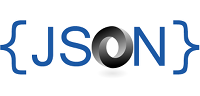

More importantly: JSON is human-readable! This means that it is easy for a human to open a JSON file and read its contents.

The `json` library can parse JSON from strings or files. The library parses JSON into a Python dictionary or list. It can also convert Python dictionaries or lists into JSON strings.

### Writing Python to JSON
Writing JSON means converting a Python object into a JSON file.
As mentioned above, the json library parses a Python dictionary or list into a JSON string and writes the file.
In order to do that, we use the `dump()` function (dump a Python object to file_path), as follows:

In [ ]:
import json
import codecs

f = codecs.open('test.json','w', 'utf-8')
data = {"name": "Frank", "age": 39, "interests": ["Long walks on the beach", "Knitting"]}

# write the data to file_path as json
json.dump(data, f)
f.close()

### Reading JSON to Python
Now that we have written some data as a json file it would be nice if we could read it back to Python. This is done with the `load` function from the json module.

In [ ]:
f = codecs.open('test.json','r', 'utf-8')
data = json.load(f)
f.close()
print(data)

Now you can write and read JSON! It is important to note at this point that JSON cannot store all types of Python objects, but only the following types:
- lists []
- dictionaries {}
- booleans: True, False
- numbers: float, int
- character strings: "string"
- None.

Thus, any other types need to be converted in order to be stored in JSON, or you will need still another data type, namely *pickle*. 

### DIY 5
Try writing the following dict to a .json file and subsequently read that file back in:

In [ ]:
d = {
    'first_name': 'Guido',
    'second_name': 'Rossum',
    'titles': ['BDFL', 'Developer'],
}

------------------------------

You've reached the end of Chapter 5! You can safely ignore the code below, it's only there to make the page pretty:

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()